### Wstęp
Celem tego projektu jest analiza danych dotyczących bioróżnorodności pochodzących z National Parks Service, w szczególności dotyczących różnych gatunków obserwowanych w różnych lokalizacjach parków narodowych.

Projekt ten będzie obejmował zakres, analizę, przygotowanie, wykreślenie danych i próbę wyjaśnienia wniosków z analizy.

Oto kilka pytań, na które ten projekt starał się odpowiedzieć:
- Jaki jest rozkład statusu ochrony gatunków?
- Czy pewne rodzaje gatunków są bardziej narażone na niebezpieczeństwo?
- Czy różnice między gatunkami i ich statusem ochrony są znaczące?
- Które zwierzę jest najbardziej rozpowszechnione i jakie jest ich rozmieszczenie wśród parków?

**Źródła Danych:**

Zarówno `Observations.csv` jak i `Species_info.csv` zostały dostarczone przez [Codecademy.com.](https://www.codecademy.com)

Uwaga: Dane do tego projektu są inspirowane prawdziwymi danymi, ale w większości są fikcyjne.

### Cel Projektu

Ten projekt będzie realizowany z perspektywy analityka bioróżnorodności dla Służby Parków Narodowych. Służba Parków Narodowych chce zapewnić przetrwanie zagrożonych gatunków, aby utrzymać poziom różnorodności biologicznej w swoich parkach. Dlatego głównymi celami jako analityka będzie zrozumienie cech o gatunkach i ich statusie ochrony, a także tych gatunków i ich związku z parkami narodowymi. 

### Dane
Ten projekt posiada dwa zestawy danych. Pierwszy plik csv zawiera informacje o każdym gatunku, a drugi zawiera obserwacje gatunków wraz z lokalizacjami parków. Dane te zostaną wykorzystane do analizy celów projektu.

### Analiza
W tej części zostaną zastosowane statystyki opisowe i techniki wizualizacji danych, aby lepiej zrozumieć dane. Wnioskowanie statystyczne zostanie również wykorzystane do sprawdzenia, czy obserwowane wartości są statystycznie istotne. Niektóre z kluczowych metryk, które zostaną obliczone to:

1. Rozkłady
1. liczebności
1. relacje między gatunkami
1. stan ochrony gatunków
1. obserwacje gatunków w parkach.

### Ocena
Na koniec nastąpi powrót do celów i sprawdzenie, czy wyniki analizy odpowiadają pytaniom, na które należało odpowiedzieć.

### Zaimportuj moduły Pythona
Najpierw zaimportowano podstawowe moduły, które będą używane w tym projekcie:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Ładowanie danych
Aby przeanalizować stan ochrony gatunków i ich obserwacje w parkach narodowych, należy załadować zbiory danych do DataFrames. Po załadowaniu do DataFrames dane mogą być eksplorowane i wizualizowane za pomocą Pythona.

W kolejnych krokach pliki `Observations.csv` i `Species_info.csv` są wczytywane jako DataFrames nazwane odpowiednio `observations` i `species`. Nowo utworzone DataFrames są przeglądane za pomocą `.head()`, aby sprawdzić ich zawartość.

#### gatunki
Plik `species_info.csv` zawiera informacje o poszczególnych gatunkach występujących w Parkach Narodowych. Kolumny w zbiorze danych obejmują:

- **category** - Kategoria taksonomiczna dla każdego gatunku
- **scientific_name** - Nazwa naukowa każdego gatunku
- **common_names** - nazwy zwyczajowe każdego gatunku
- **conservation_status** - stan ochrony gatunku

In [3]:
species = pd.read_csv('species_info.csv', encoding = 'utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### obserwacje
Plik `Observations.csv` zawiera informacje z zarejestrowanych obserwacji różnych gatunków na terenie parków narodowych w ciągu ostatnich 7 dni. Zawarte kolumny to:

- **scientific_name** - Nazwa naukowa każdego gatunku.
- **park_name** - nazwa parku narodowego
- **observations** - liczba obserwacji w ciągu ostatnich 7 dni

In [28]:
observations = pd.read_csv('observations.csv', encoding = 'utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Charakterystyka danych
Następnie nastąpi sprawdzenie wymiarów zbiorów danych, dla gatunków jest 5 824 wierszy i 4 kolumny, natomiast obserwacje mają 23 296 wierszy i 3 kolumny.

In [5]:
print('Obserwacje: ' + str(observations.shape))
print('Gatunki: ' + str(species.shape))

Obserwacje: (23296, 3)
Gatunki: (5824, 4)


### Eksploracja danych
Pierwszą rzeczą jest znalezienie liczby odrębnych gatunków w danych. Użyto kolumny `scientific_name`, aby uzyskać 5,541 unikalnych gatunków.

In [6]:
liczba_gatunkow = species['scientific_name'].nunique()
print("Liczba unikalnych gatunków: ", liczba_gatunkow)

Liczba unikalnych gatunków:  5541


Następnie znaleźono liczbę kategorii, które są reprezentowane w danych i jest ich 7, w tym zwierzęta i rośliny.

In [7]:
print(f"Liczba kategorii: {species.category.nunique()}")
print(f"Kategorie: {', '.join(species.category.unique())}")

Liczba kategorii: 7
Kategorie: Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant


Tutaj mamy szansę wgłębić się o jeden poziom głębiej i zobaczyć liczbę gatunkow z każdej kategorii. Rośliny naczyniowe jest zdecydowanie najwięcej bo aż 4,470 , przy czym gadów jest najmniej a konkretnie 79.

In [8]:
species['category'].value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

Kolejną kolumną do zbadania jest `conservation_status`. Kolumna posiada 4 kategorie, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery` oraz wartości `nan`.

In [9]:
print(f"Liczba kategorii: {species.conservation_status.nunique()}")
print(f"Status wyginięcia: {(species.conservation_status.unique())}")

Liczba kategorii: 4
Status wyginięcia: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Następnie dokonano zliczenia liczby obserwacji w podziale na kategorie w `conservation_status`. Wartości nan jest 5 633, co oznacza, że są to gatunki niezagrożone.  Z drugiej strony, istnieje 161 gatunków wymagających ochrony, 16 zagrożonych, 10 zagrożonych wyginięciem i 4 objęte procesem odzyskiwania.

Uwaga: W większości przypadków natrafiając na wartości `nan` należy zachować ostrożność, jednak brak danych w tym miejscu oznacza, że gatunki te nie są objęte żadnym statusem ochronnym.

In [10]:
print (f" Liczba wartości Na : {species['conservation_status'].isna().sum()}")
species['conservation_status'].value_counts()

 Liczba wartości Na : 5633


Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

#### obserwacje

W kolejnej części przyjrzano się danym dotyczącym obserwacji. Pierwszym zadaniem było sprawdzenie liczby parków, które znajdują się w zbiorze danych i są tylko 4 parki narodowe.

In [11]:
print(f"Liczba parków: {observations.park_name.nunique()}")
print(f"Park Narodowy: {(observations.park_name.unique())}")

Liczba parków: 4
Park Narodowy: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Oto łączna liczba obserwacji zarejestrowanych w parkach, w ciągu ostatnich 7 dni odnotowano 3 314 739 obserwacji

In [12]:
print(f"Liczba obserwacji: {observations.observations.sum()}")

Liczba obserwacji: 3314739


### Analiza
W tej części rozpoczęto analizę danych po wstępnej eksploracji. Pierwszym zadaniem będzie wyczyszczenie i eksploracja kolumny `conservation_status` w gatunkach.

Kolumna `conservation_status` ma kilka możliwych wartości:

- `Species of Concern`: zanikające lub wydają się wymagać ochrony.
- `Threatened`: narażony na niebezpieczeństwo w najbliższej przyszłości
- `Endangered`: poważnie zagrożony wyginięciem
- `In Recovery`: dawniej `Endangered`, ale obecnie nie jest zagrożony wyginięciem na całej lub znacznej części swojego zasięgu
Podczas eksploracji wykryto wiele wartości `nan`. Wartości te będą musiały zostać przekształcone na `No Intervention`.

In [13]:
species.fillna('No Intervention', inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Następnie należy sprawdzić różne kategorie, w kolumnie `conservation_status` z wyjątkiem tych, które nie wymagają interwencji. Poniżej znajduje się zarówno tabela jak i wykres do zbadania.

W przypadku tych w statusie `Endangered`, 7 było ssakami, a 4 ptakami. W statusie `In Recovery` były 3 ptaki i 1 ssak, co może ewentualnie oznaczać, że ptaki odbijają się bardziej niż ssaki.

In [14]:
conservatioCategory = species[species['conservation_status'] != 'No Intervention'].groupby(['conservation_status','category'])['scientific_name'].count().unstack()
conservatioCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

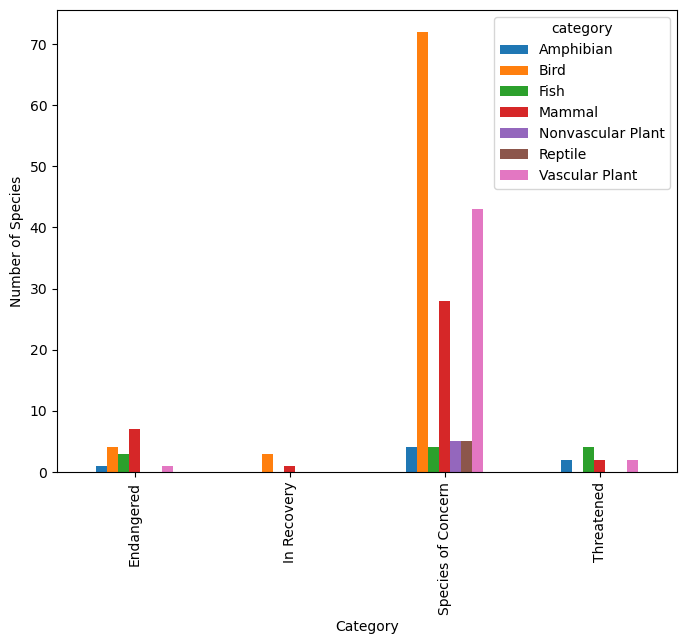

In [15]:
ax = conservatioCategory.plot(kind='bar', figsize=(8,6))
ax.set_xlabel('Category')
ax.set_ylabel('Number of Species')

#### W ochronie przyrody
Kolejne pytanie brzmi, czy pewne rodzaje gatunków są bardziej narażone na niebezpieczeństwo? Można na to odpowiedzieć, tworząc nową kolumnę o nazwie `is_protected` i włączając do niej wszelkie gatunki, które miały wartość inną niż `No Intervention`.

In [16]:
species['is_protected'] = species['conservation_status'] != 'No Intervention'


Kiedy nowa kolumna jest już utworzona, pogrupowano ją według `category` i `is_protected`, aby pokazać podział na każdy typ gatunku i status ochrony.

Łatwo zauważyć, że ptaki, rośliny naczyniowe i ssaki mają większą bezwzględną liczbę chronionych gatunków.

In [17]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Liczby bezwzględne nie zawsze są najbardziej użyteczną statystyką, dlatego ważne jest obliczenie procentu wskaźnika ochrony, jaki każda kategoria wykazuje. Z tej analizy widać, że około 17 procent ssaków było pod ochroną, podobnie jak około 15 procent ptaków.

In [18]:
category_counts['percent protected'] = (category_counts['protected']/(category_counts['protected'] + category_counts['not_protected']))*100
category_counts

,category,not_protected,protected,percent protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Znaczenie statystyczne
W tej części przeprowadzono kilka testów chi kwadrat, aby sprawdzić, czy różne gatunki mają statystycznie istotne różnice we wskaźnikach stanu ochrony. Aby przeprowadzić test chi kwadrat, należy utworzyć tabelę kontyngencji. Tabela warunkowa powinna wyglądać następująco:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Pierwszy test będzie się nazywał `contingency1` i trzeba będzie go wypełnić poprawnymi liczbami dla ssaków i ptaków.

Wyniki z testu chi kwadrat zwracają kilka wartości, druga wartość, która wynosi 0,69 to wartość p. Standardowa wartość p do badania istotności statystycznej wynosi 0,05. Dla wartości odzyskanej z tego testu, wartość 0,69 jest znacznie większa niż 0,05. W przypadku ssaków i ptaków nie wydaje się, aby istniała między nimi istotna zależność, tj. zmienne są niezależne.

In [19]:
from scipy.stats import chi2_contingency
contingency1 = [[30,146],
               [75,413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

Następna para, będzie testować różnicę między gadami i ssakami.

Format jak poniżej:
    

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

Tym razem wartość p wynosi 0,039, co jest poniżej standardowego progu 0,05, co można przyjąć, że różnica między gadami a ssakami jest statystycznie istotna. Wykazano, że ssaki mają statystycznie istotnie wyższy wskaźnik potrzebnej ochrony w porównaniu z gadami.

In [20]:
contingency2 = [[30,146],
               [5,73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

### Gatunki w parkach
Następny zestaw analiz będzie pochodził z danych od konserwatorów, ponieważ przez ostatnie 7 dni rejestrowali oni obserwacje różnych gatunków w kilku parkach narodowych.

Pierwszym krokiem jest przyjrzenie się wspólnym nazwom gatunków, aby zorientować się, jakie zwierzęta najczęściej występują w zbiorze danych. Dane będą musiały zostać podzielone na poszczególne nazwy.

In [21]:
from itertools import chain
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.replace(',', '')\
    .str.split().tolist()
common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Następnym krokiem jest wyczyszczenie zduplikowanych słów w każdym rzędzie, ponieważ nie powinny być one liczone więcej niż raz na gatunek.

In [22]:
unique_names = []
for row in common_names:
    unique_names.append(list(set(row)))
unique_names[0:6]

[['Vole', 'Gappers', 'RedBacked'],
 ['Bison', 'American'],
 ['Domestic', 'Domesticated', 'Feral', 'Cattle', 'Aurochs'],
 ['Domestic', 'Red', 'Feral', 'Sheep', 'Mouflon'],
 ['Wapiti', 'Elk', 'Or'],
 ['Deer', 'WhiteTailed']]

Następnie gatunki muszą być zwinięte w jedną listę dla łatwiejszego użycia.

In [23]:
import itertools

flat_list = list(itertools.chain.from_iterable(unique_names))
flat_list[:6]

['Vole', 'Gappers', 'RedBacked', 'Bison', 'American', 'Domestic']

Teraz dane są gotowe, aby móc policzyć liczbę wystąpień każdego słowa. Z tej analizy wynika, że nietoperz wystąpił 23 razy, natomiast Ryjówka pojawiła się 18 razy.

In [24]:
word_counted = {}
for word in flat_list:
    if word in word_counted:
        word_counted[word] += 1
    else:
        word_counted[word] = 1
word_df = pd.DataFrame.from_dict(word_counted, orient='index', columns=['Count'])
word_df.index.name = 'Word'
word_df = word_df.sort_values('Count', ascending=False)
word_df

,Count
Word,
Bat,23
Shrew,18
Myotis,17
Mouse,16
Chipmunk,13
...,...
House,1
Stones,1
WhiteFooted,1


W danych występuje kilka różnych nazw naukowych dla różnych rodzajów nietoperzy. Następnym zadaniem jest ustalenie, które rzędy  odnoszą się do nich. Zostanie utworzona nowa kolumna złożona z wartości boolean, która będzie sprawdzać, czy `is_bat` jest `True`.

In [25]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [26]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Oto część zbioru danych, gdzie `is_bat` jest prawdziwy. Wydaje się, że istnieje wiele gatunków nietoperzy i są one zarówno chronione jak i nie chronione.

Następnie wyniki dotyczące gatunków nietoperzy zostaną połączone z obserwacjami, aby stworzyć DataFrame z obserwacjami nietoperzy w danych parkach narodowych.

In [33]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Zobaczmy, ile łącznie obserwacji nietoperzy (wszystkich gatunków) przeprowadzono w poszczególnych parkach narodowych.

Całkowita liczba nietoperzy zaobserwowanych w każdym z parków w ciągu ostatnich 7 dni znajduje się w poniższej tabeli. Największą liczbę obserwacji odnotował Park Narodowy Yellowstone - 8 362, a najmniejszą Park Narodowy Great Smoky Mountains - 2 411.

In [38]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Teraz zobaczmy każdy park w rozbiciu na obserwacje nietoperzy chronionych i niechronionych. Wygląda na to, że każdy park z wyjątkiem Parku Narodowego Great Smoky Mountains ma więcej obserwacji nietoperzy chronionych niż niechronionych. Można to uznać za świetny znak dla nietoperzy.

In [43]:
grouped_data = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
grouped_data

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Poniżej znajduje się wykres z ostatniej manipulacji danymi. Z tego wykresu widać, że Parki Narodowe Yellowstone i Bryce wydają się robić świetną robotę ze swoimi populacjami nietoperzy, ponieważ jest tam więcej obserwacji chronionych nietoperzy w porównaniu do gatunków niechronionych. Park Narodowy Great Smoky Mountains powinien zwiększyć swoje wysiłki w zakresie ochrony przyrody, ponieważ zaobserwowano tam więcej gatunków niechronionych.

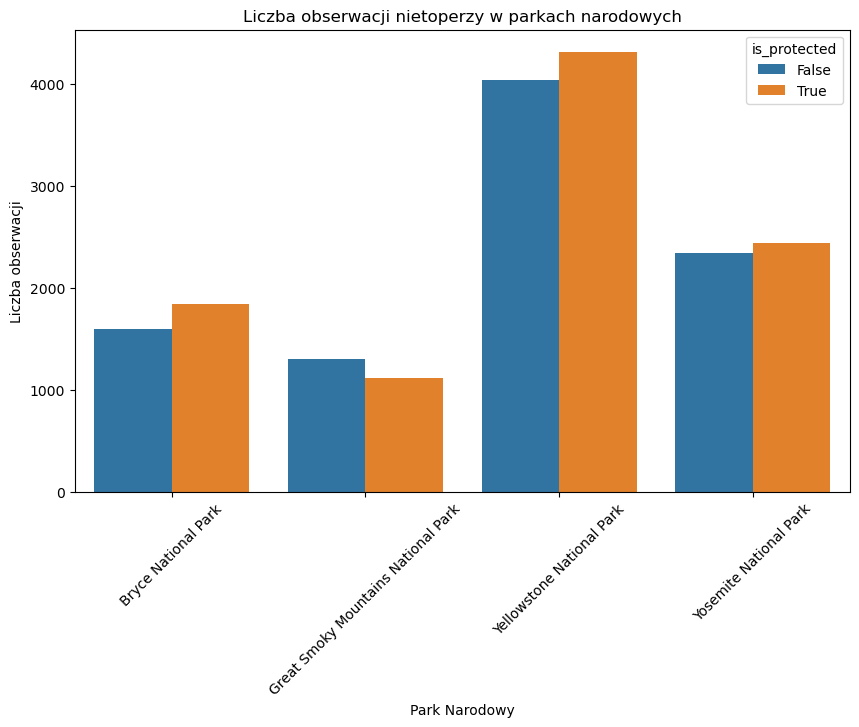

In [51]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'park_name', y = 'observations', hue = 'is_protected', data = grouped_data)
plt.title('Liczba obserwacji nietoperzy w parkach narodowych')
plt.xlabel('Park Narodowy')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation=45)
plt.show()

### Wnioski
W ramach projektu udało się dokonać kilku wizualizacji danych i wyciągnąć wnioski na temat różnych gatunków w czterech parkach narodowych, które stanowiły zbiór danych.

Projekt ten był również w stanie odpowiedzieć na niektóre z pytań postawionych na początku:

- Jaki jest rozkład statusu ochrony gatunków?
  - Zdecydowana większość gatunków nie była objęta ochroną.(5,633 vs 191)
- Czy pewne rodzaje gatunków są bardziej narażone na niebezpieczeństwo?
  - Ssaki i Ptaki miały najwyższy odsetek bycia w ochronie.
- Czy różnice pomiędzy gatunkami i ich statusem ochrony są znaczące?
  - Podczas gdy ssaki i ptaki nie miały znaczącej różnicy w procencie bycia pod ochroną, ssaki i gady wykazywały statystycznie istotną różnicę.
- Jakie zwierzęta występują najczęściej i jakie jest ich rozmieszczenie w parkach?
  - W badaniu stwierdzono, że najwięcej razy wystąpiły nietoperze i najczęściej można je było spotkać w Parku Narodowym Yellowstone.

### Dalsze badania
Ten zbiór danych zawierał tylko obserwacje z ostatnich 7 dni, co uniemożliwia analizę zmian w czasie. Byłoby ciekawe zobaczyć, jak zmienia się status ochrony różnych gatunków w czasie. Innym brakującym elementem jest powierzchnia każdego parku, można założyć, że Park Narodowy Yellowstone może być znacznie większy niż inne parki, co oznaczałoby, że wykazywałby więcej obserwacji i większą różnorodność biologiczną. Ostatecznie, gdyby rejestrowano dokładne lokalizacje, można by również obserwować przestrzenne rozmieszczenie gatunków i sprawdzić, czy te obserwacje są przestrzennie zgrupowane.

In [ ]:
c